# Importing Libraries

In [1]:
# Importing important libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

## Reading and Understanding the Data

In [2]:
# Reading the data
df_house = pd.read_csv('train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking number of rows and columns in data
df_house.shape

(1460, 81)

In [4]:
# Checking the information of columns
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking for duplicates
df_house.duplicated().sum()

0

# Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.



We'll visualise our data using `matplotlib` and `seaborn`.

### Univariate Analysis on Numerical & Categorical Columns.


#### EDA on Numerical Columns

##### Dividing the dataframe into numerical and categorical columns for EDA

In [6]:
# Selecting numerical columns
df_house_num = df_house.select_dtypes(include=['int64', 'float64'])
df_house_num.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [7]:
# Selecting categorical columns
df_house_cat = df_house.select_dtypes(include='object')
df_house_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


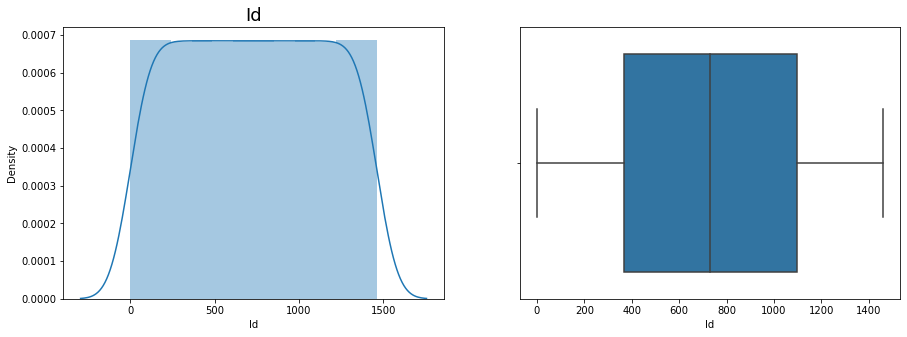

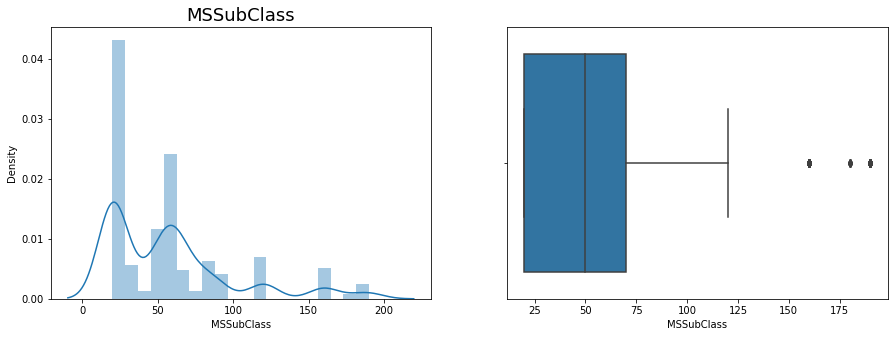

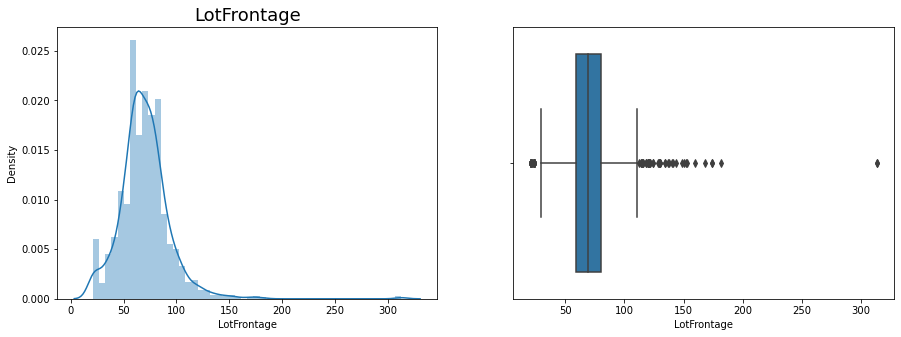

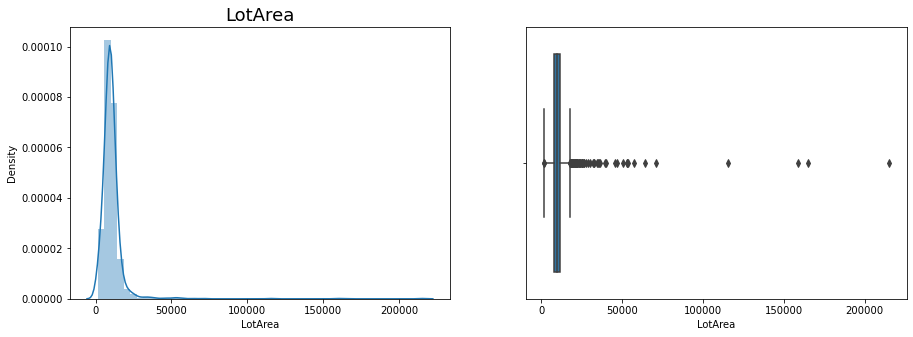

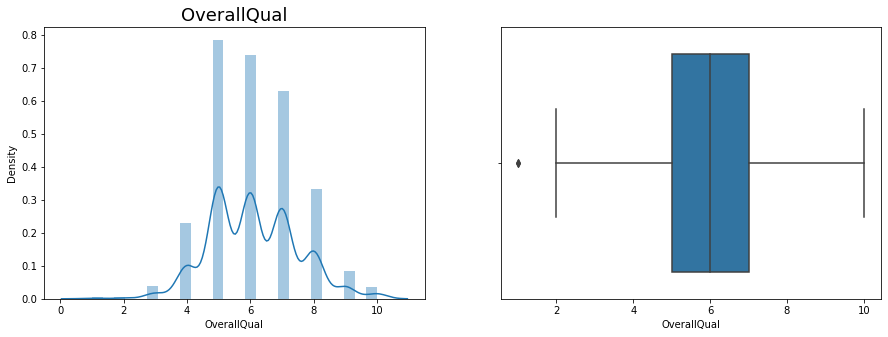

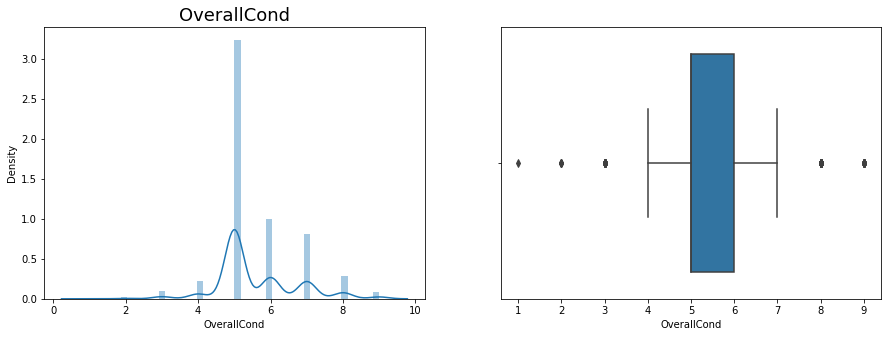

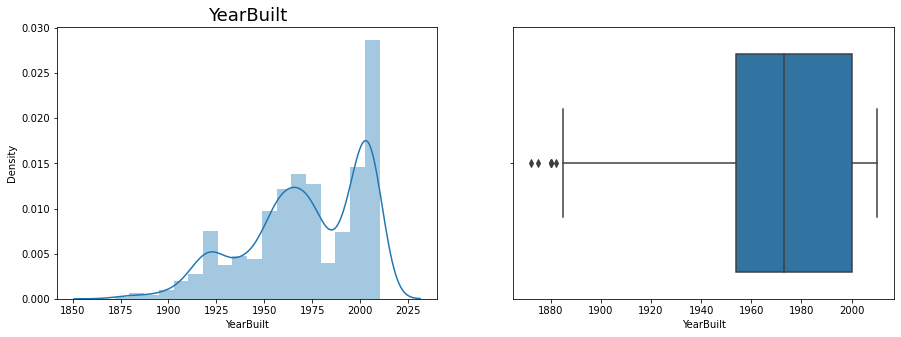

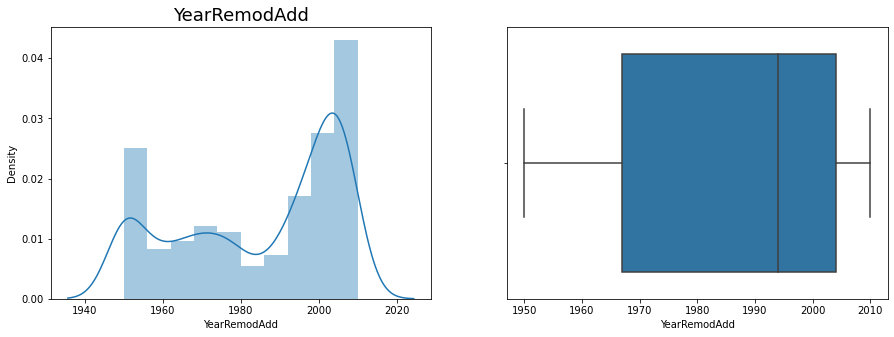

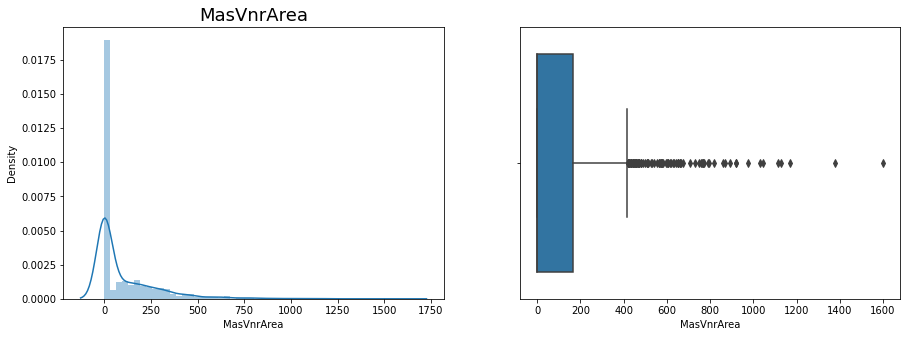

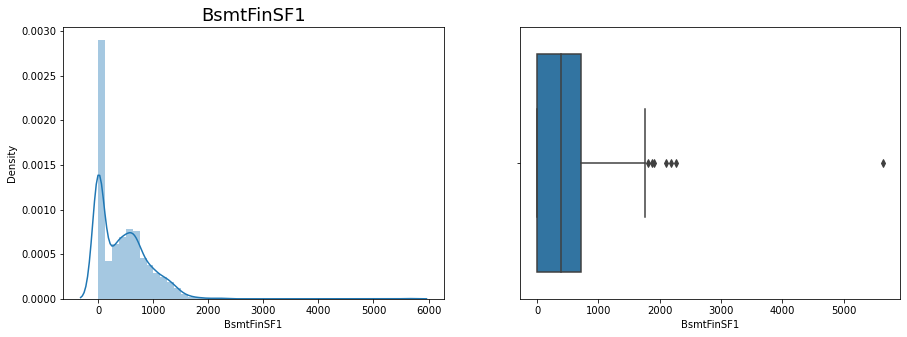

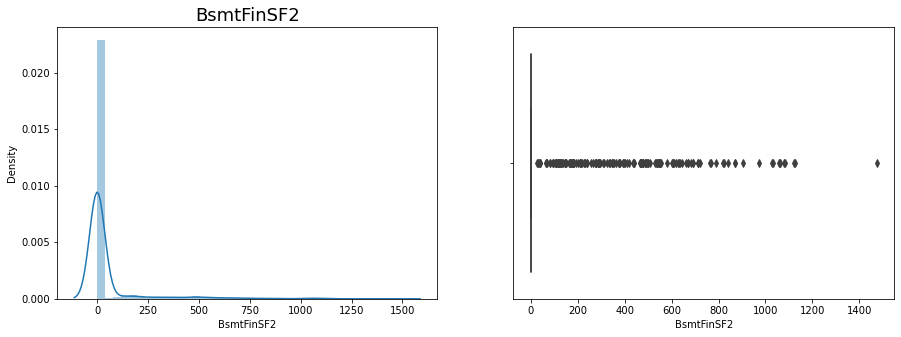

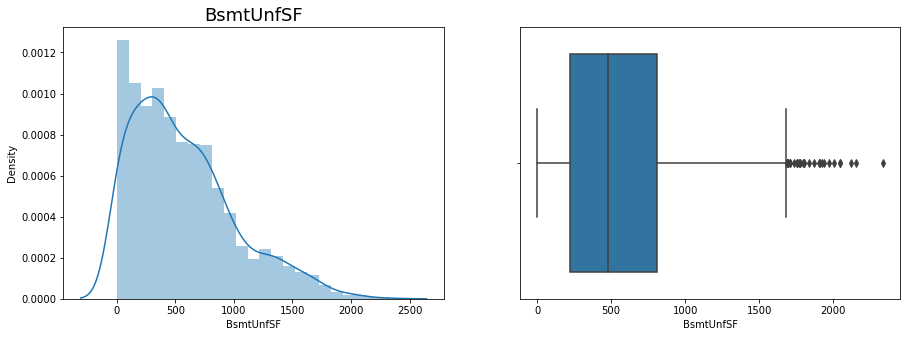

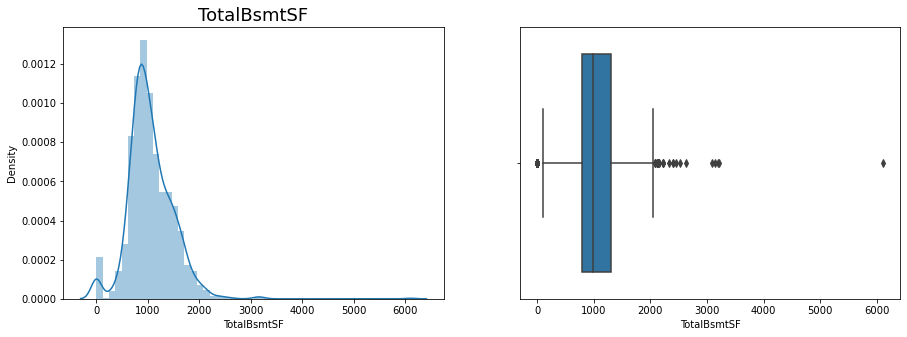

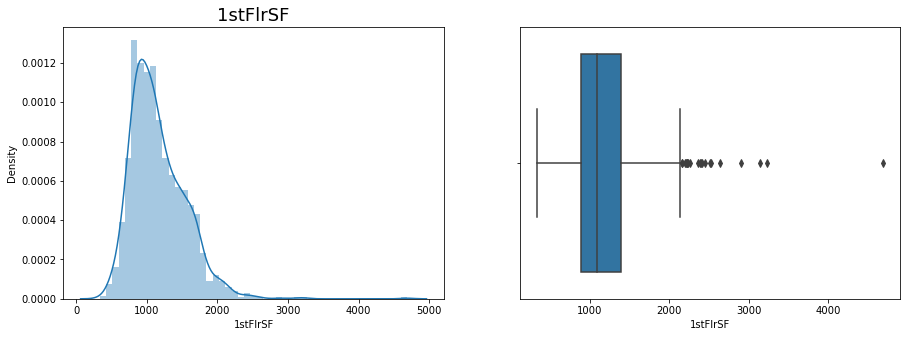

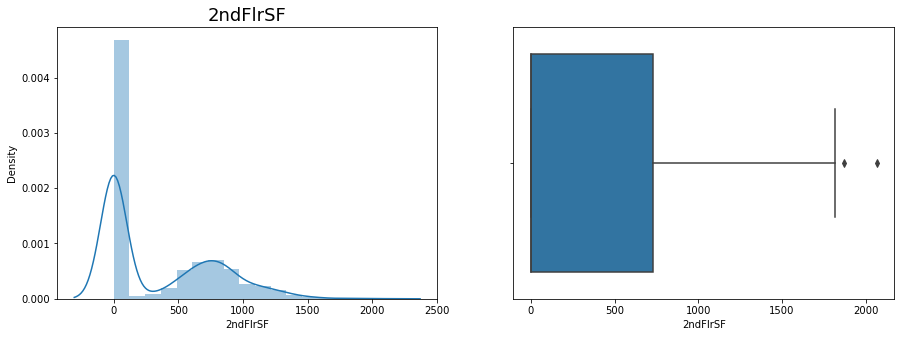

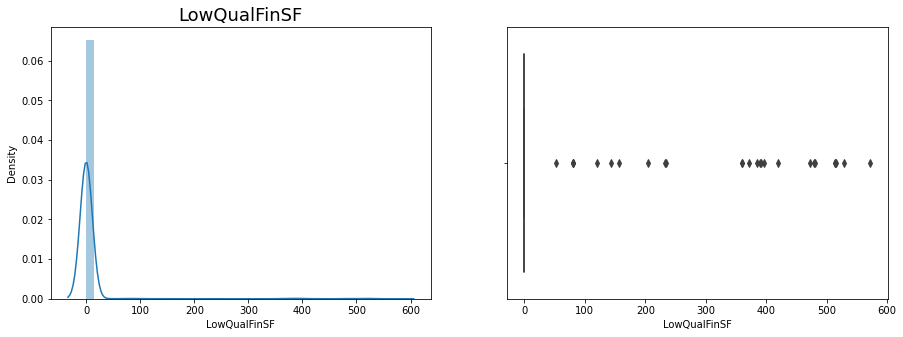

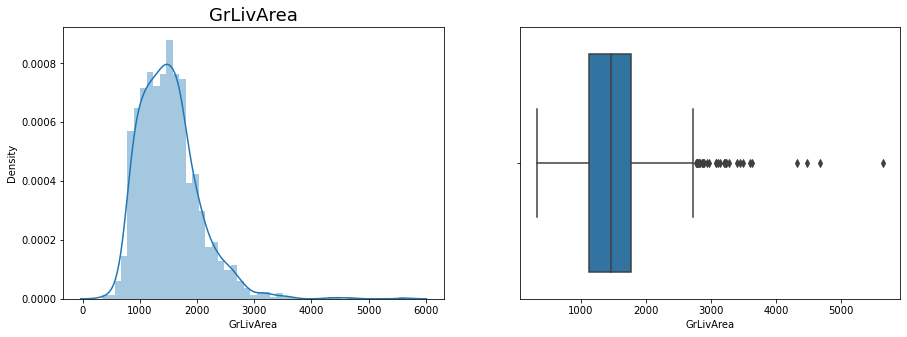

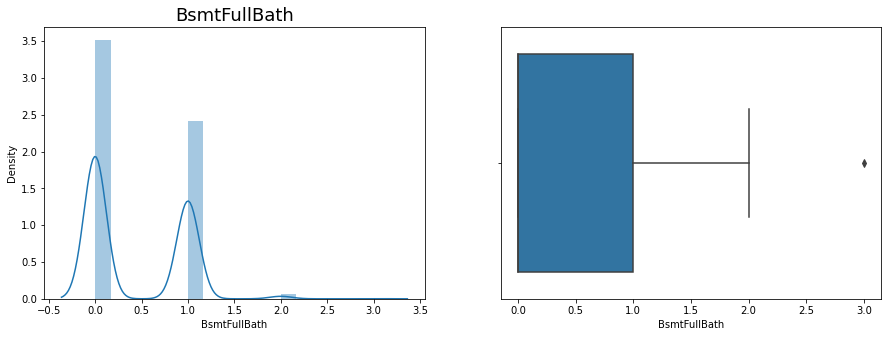

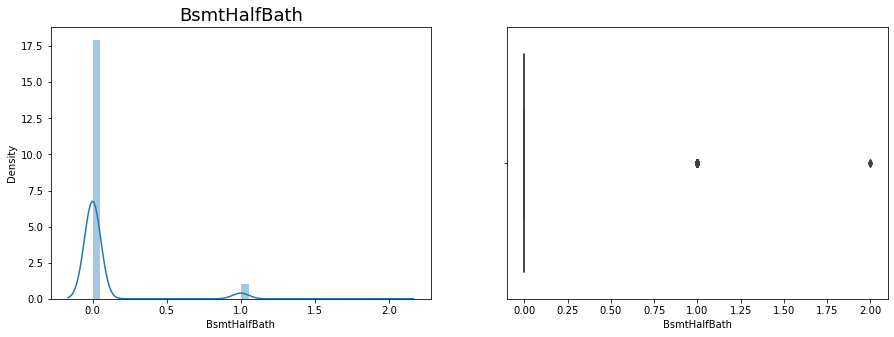

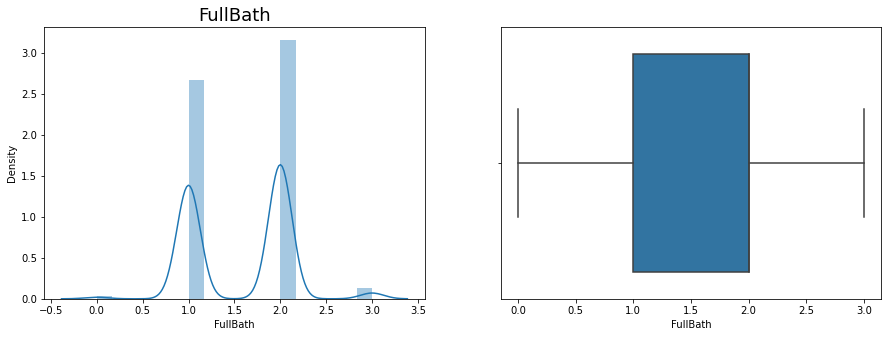

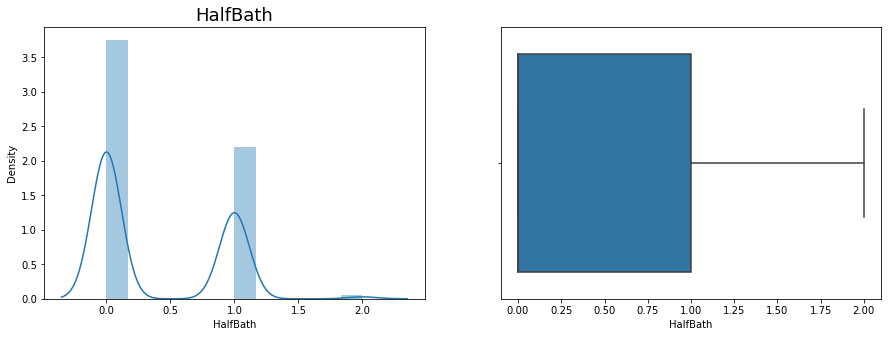

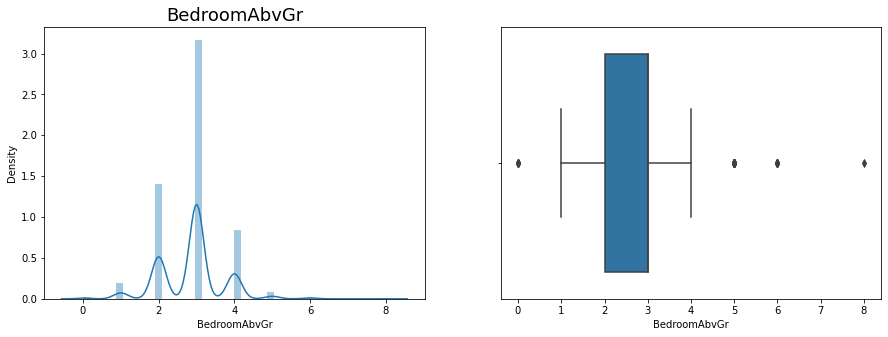

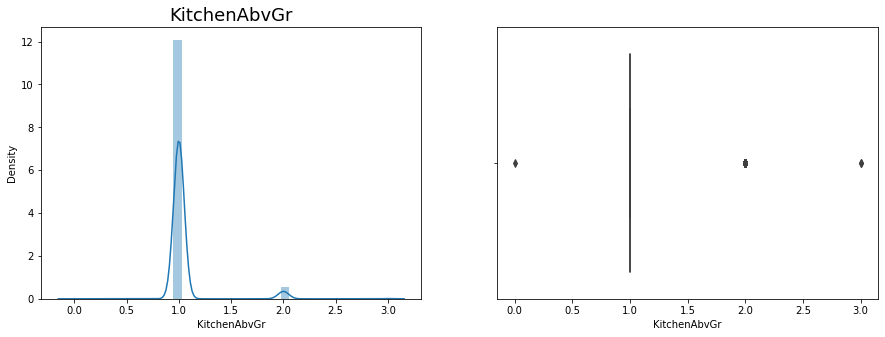

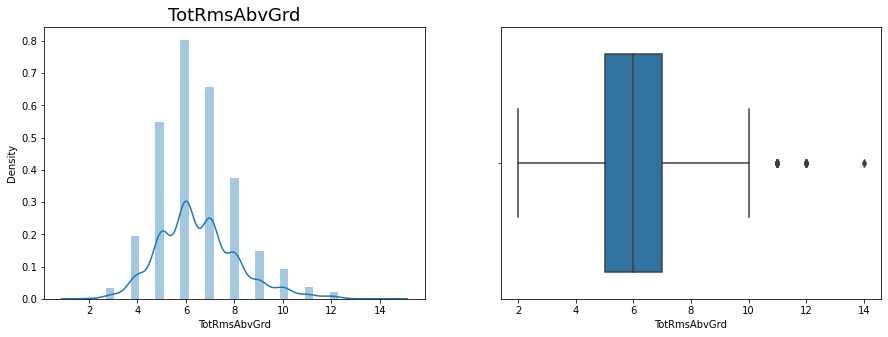

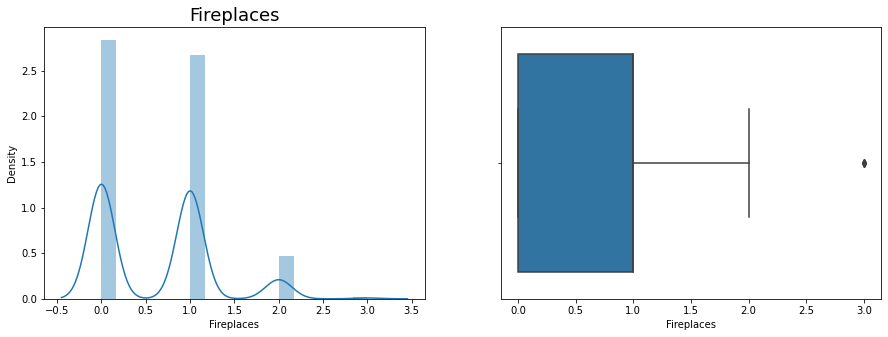

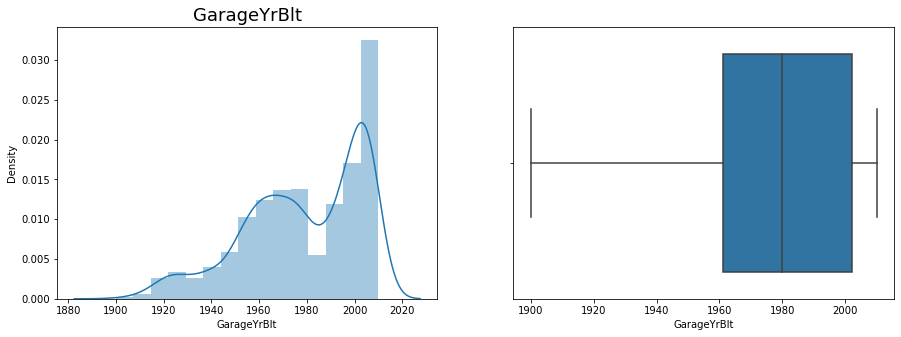

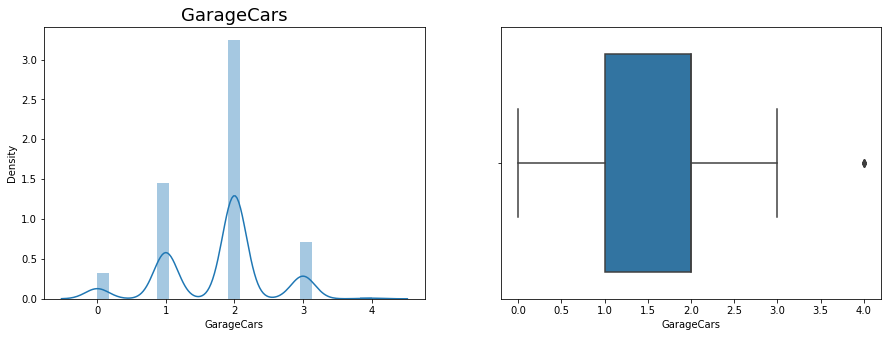

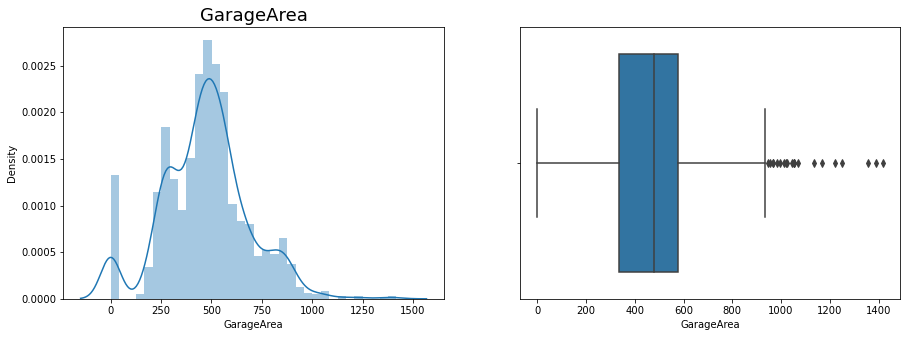

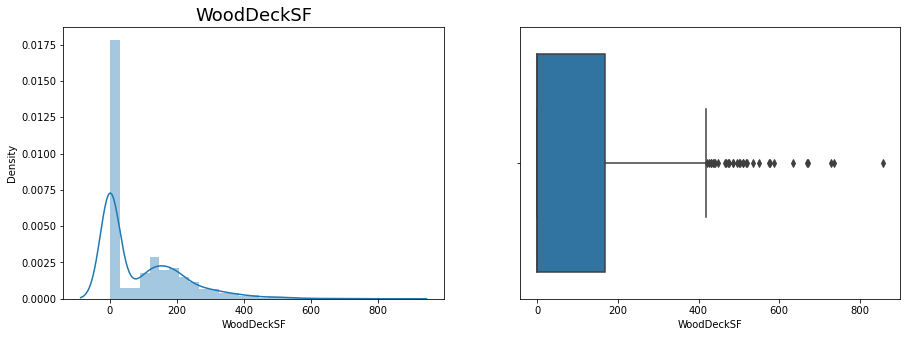

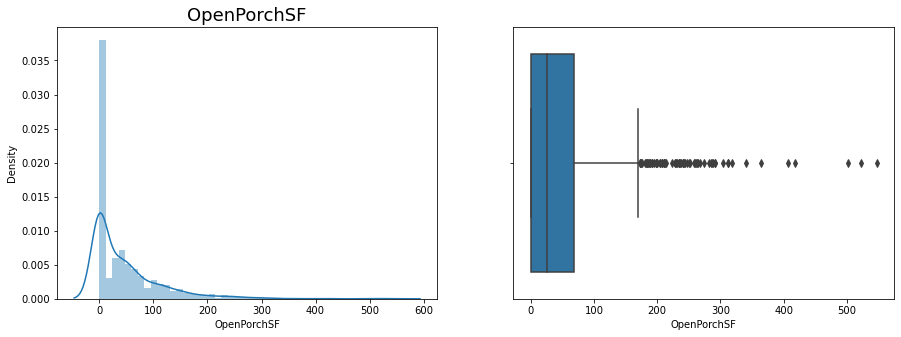

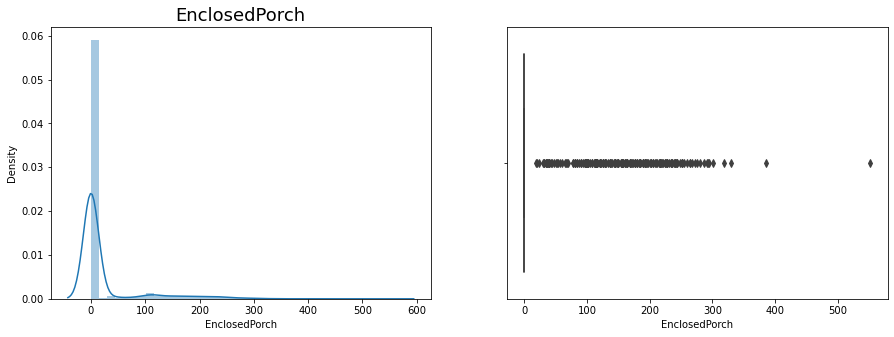

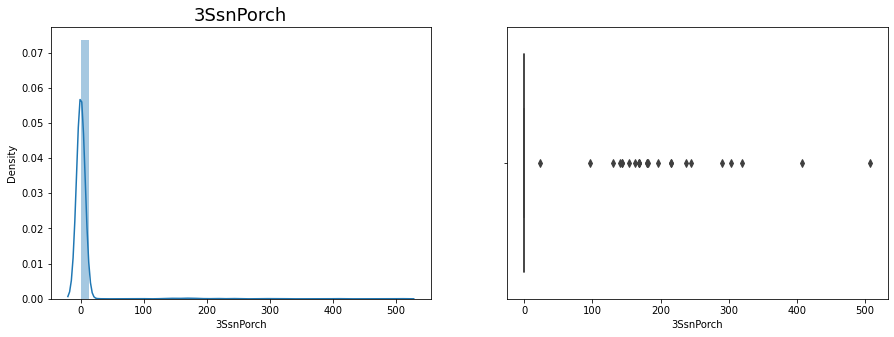

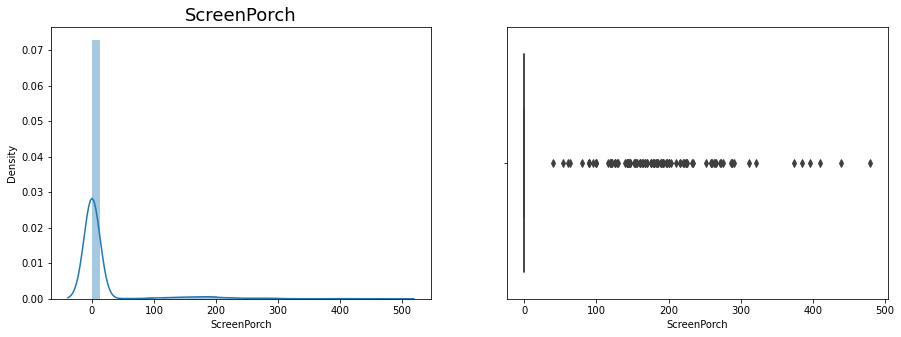

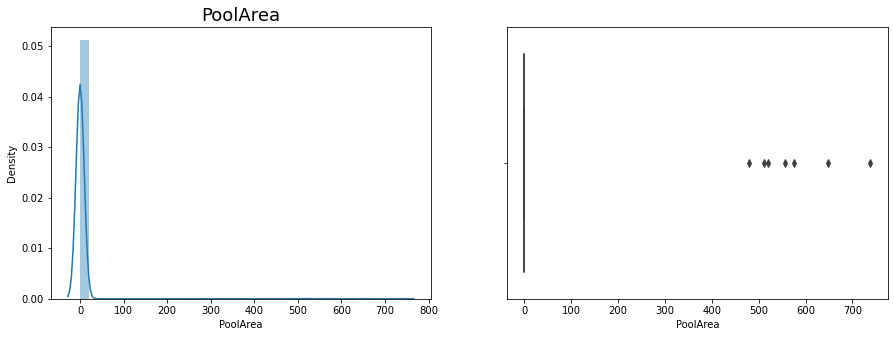

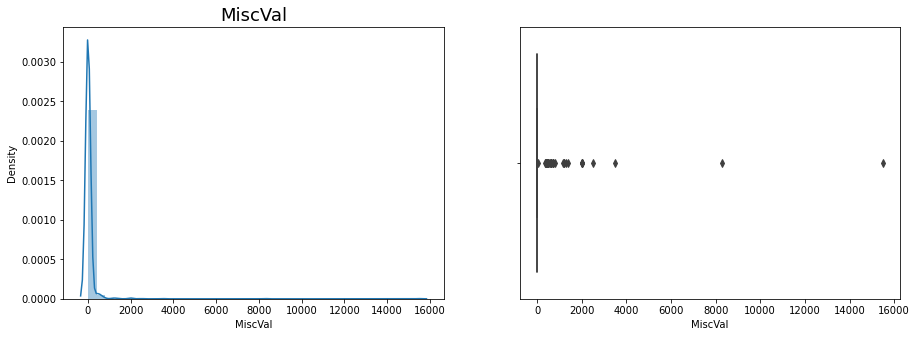

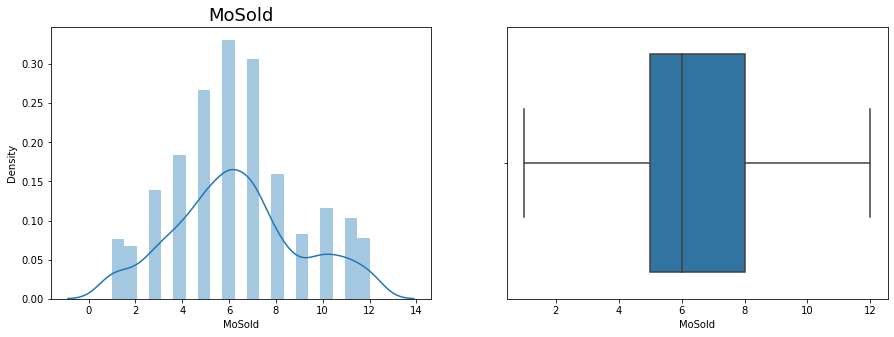

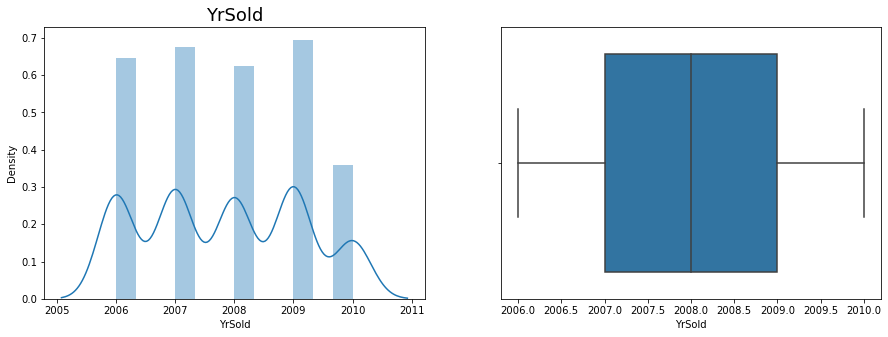

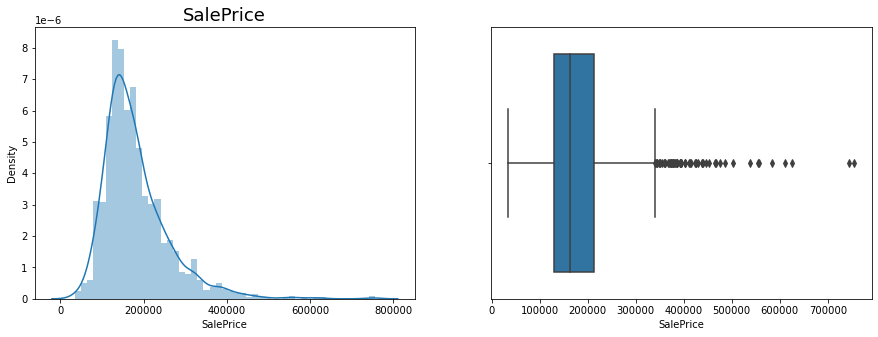

In [8]:
# Checking the distribution of all numerical variables using histograms and boxplots

for col in df_house_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_house_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_house_num[col])
    plt.show()

**Observation:**
    
Numerical columns are having non-normal distribution in many columns.

Most of the them have outliers. So, we have to do the Outlier treatment later.

#### EDA on Categorical Columns 

In [9]:
# Checking the unique values in Categorical columns
for col in df_house_cat.columns:
    print(col)
    print(df_house[col].unique(), '\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
[nan 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

Ex

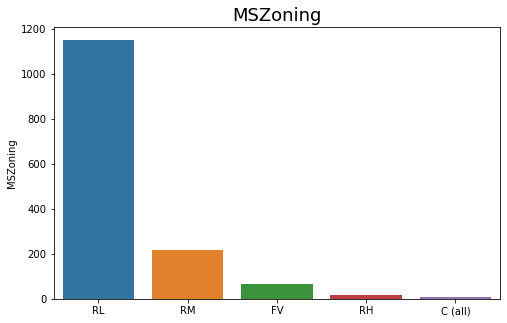

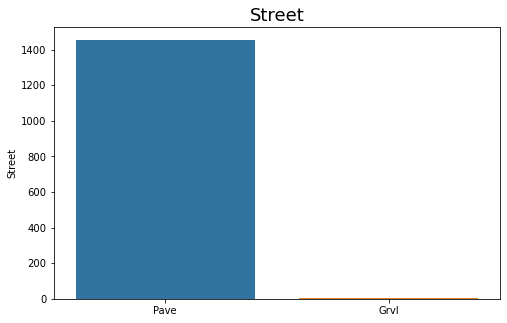

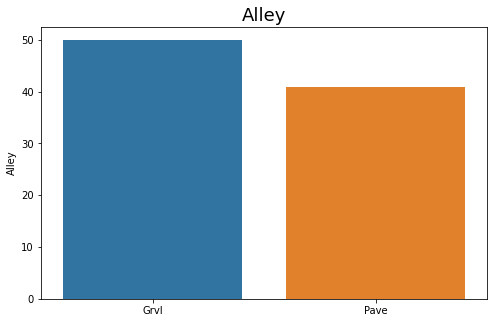

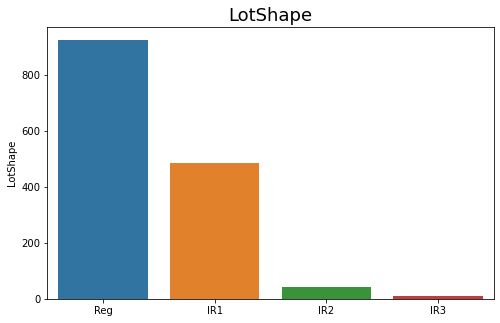

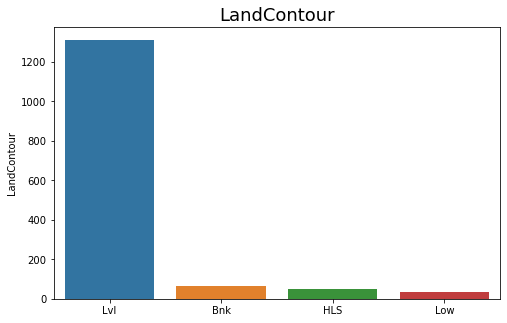

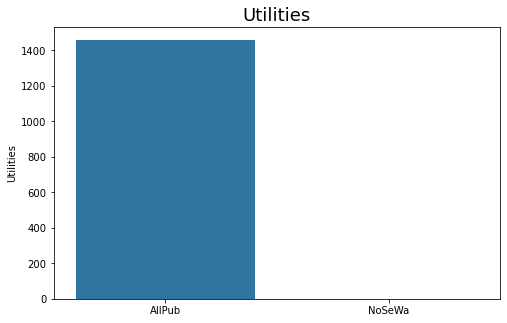

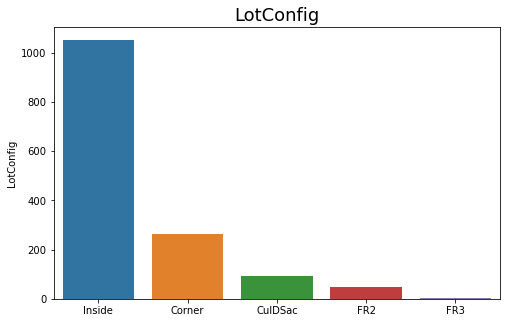

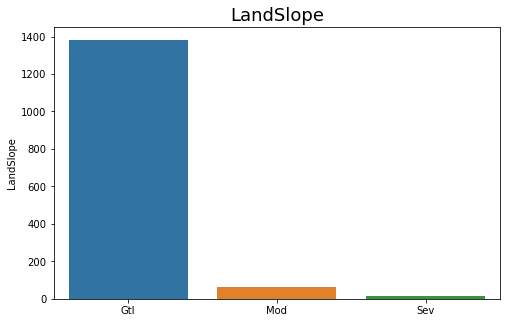

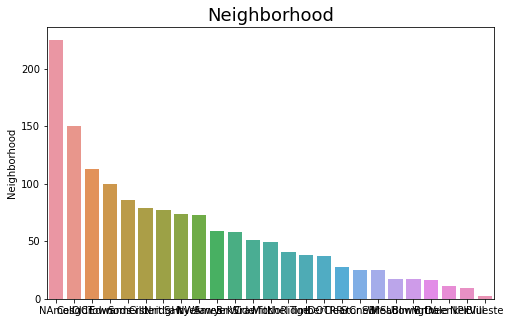

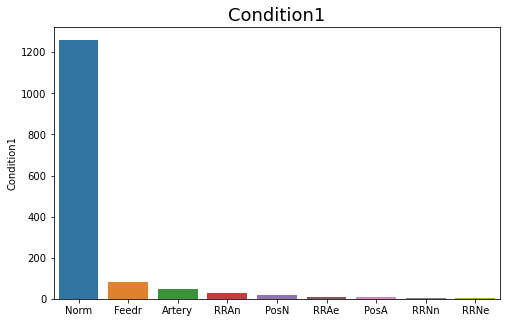

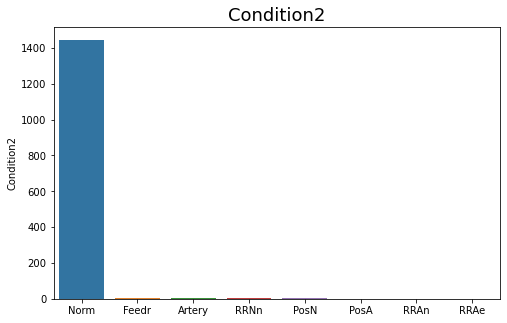

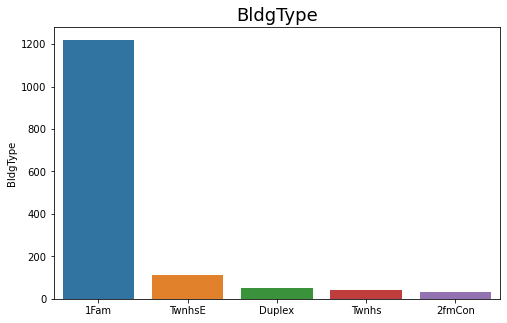

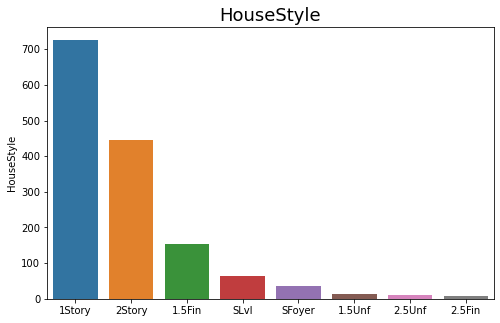

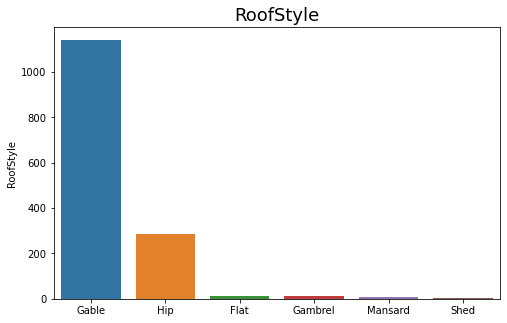

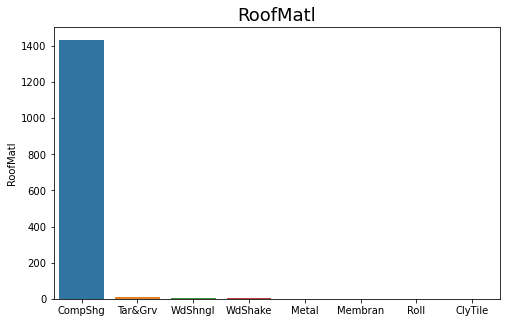

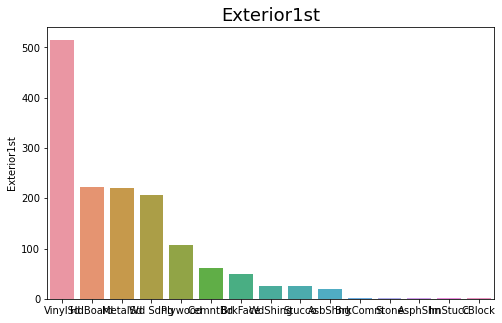

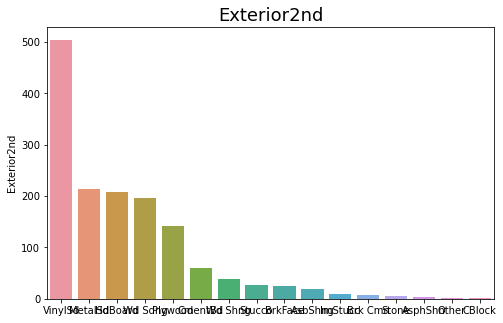

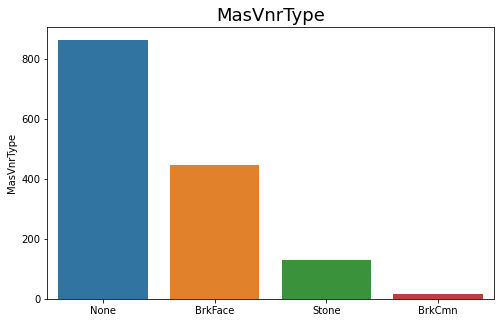

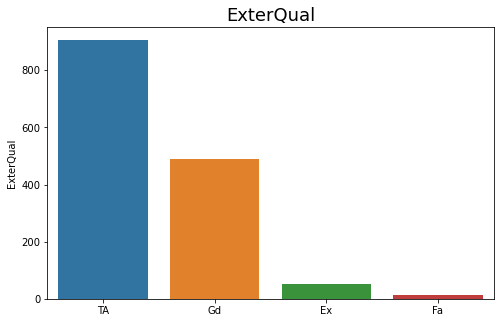

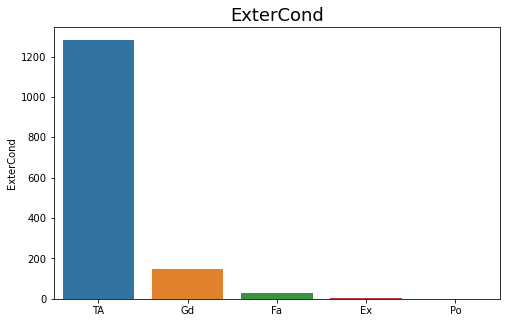

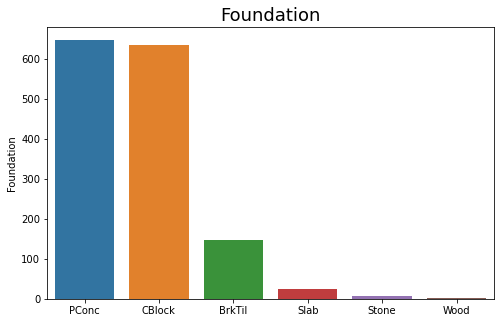

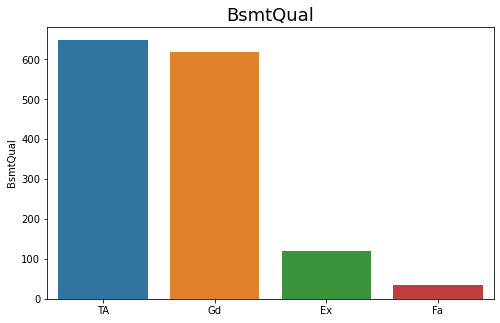

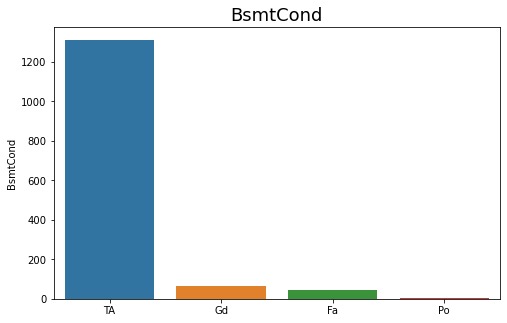

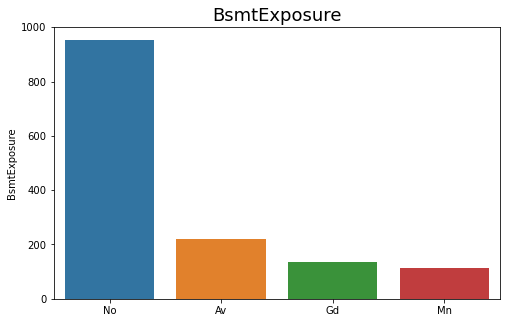

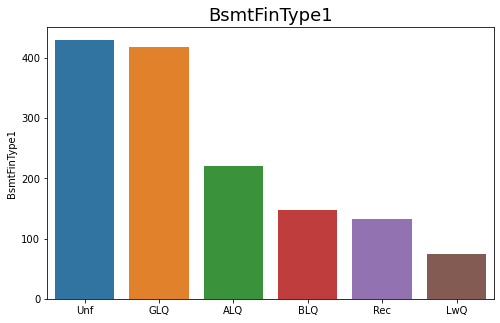

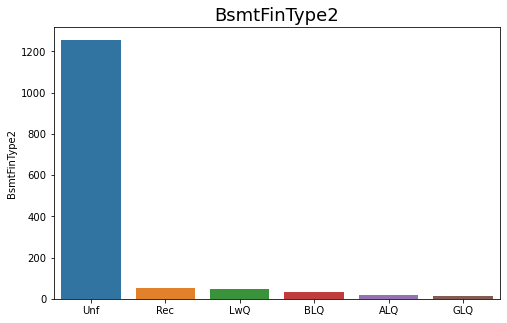

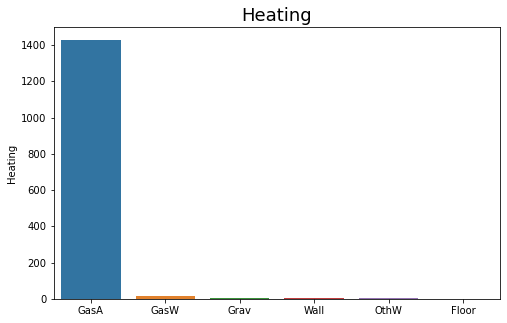

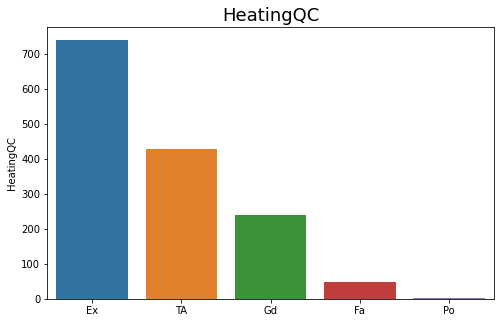

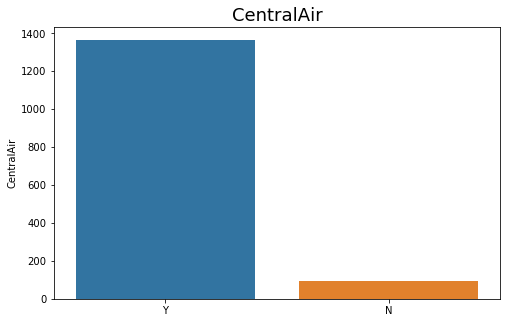

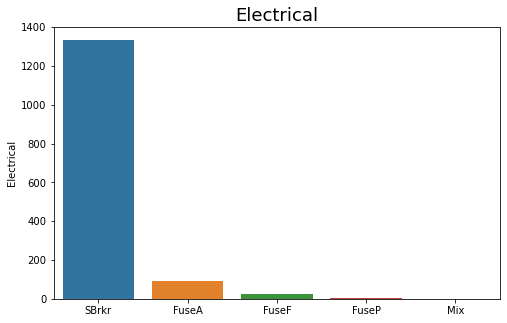

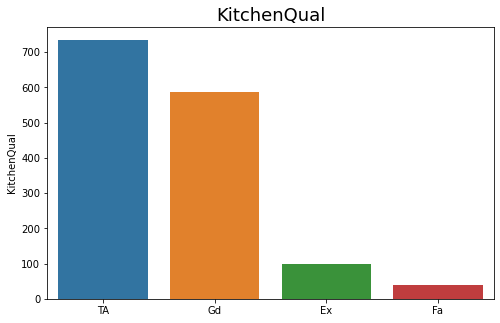

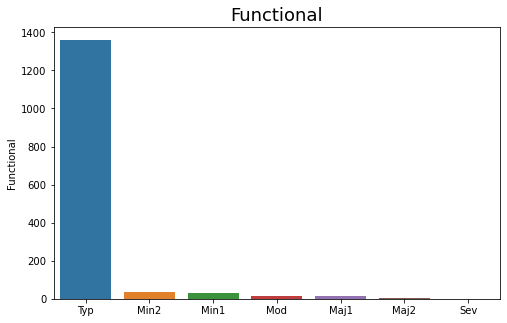

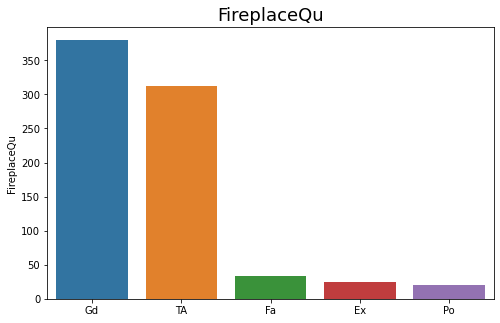

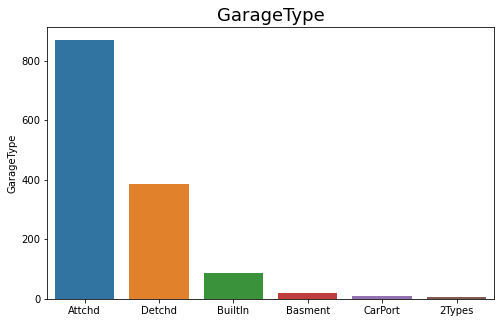

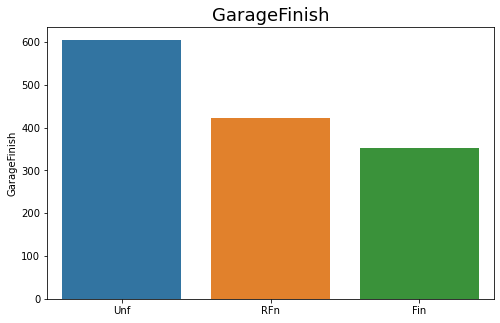

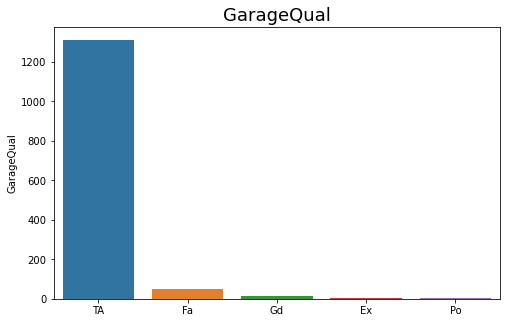

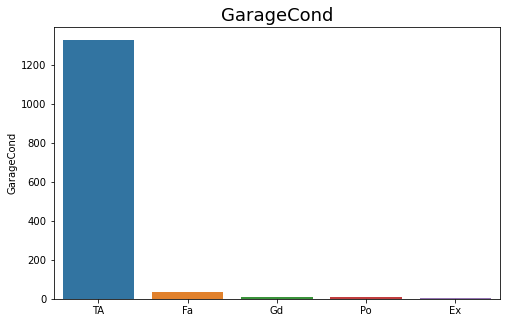

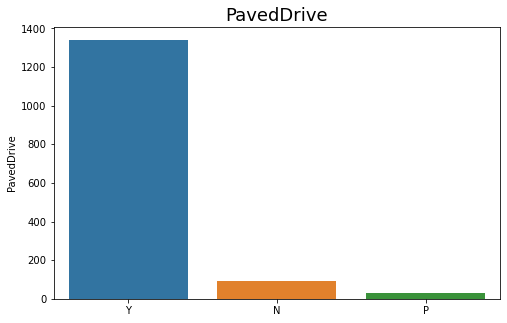

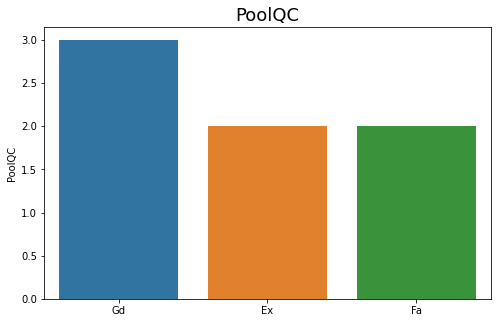

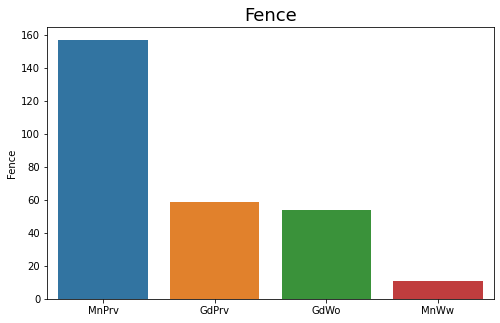

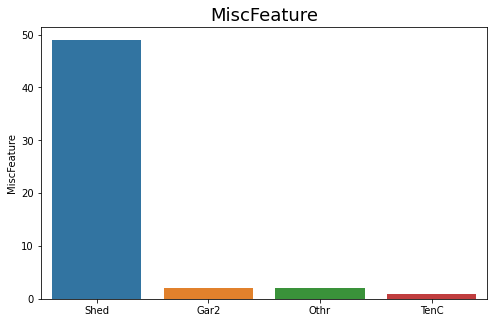

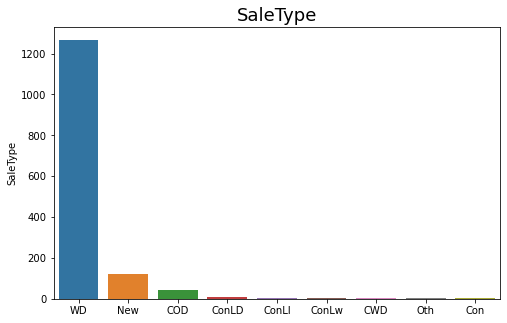

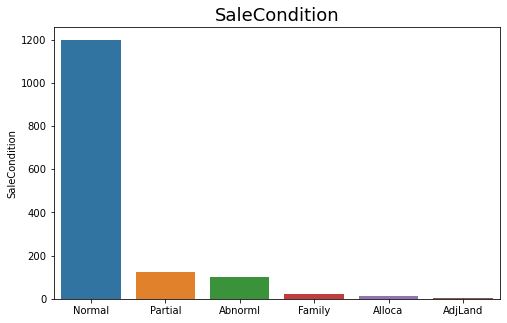

In [10]:
# Checking the distribution of categorical columns by using bar plots
for col in df_house_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_house_cat[col].value_counts().index, df_house_cat[col].value_counts())
    plt.show()

**Observation:**
    
According to the above graph, we can see that there is no column with single unique value that we could remove from our data.

### Bivariate Analysis

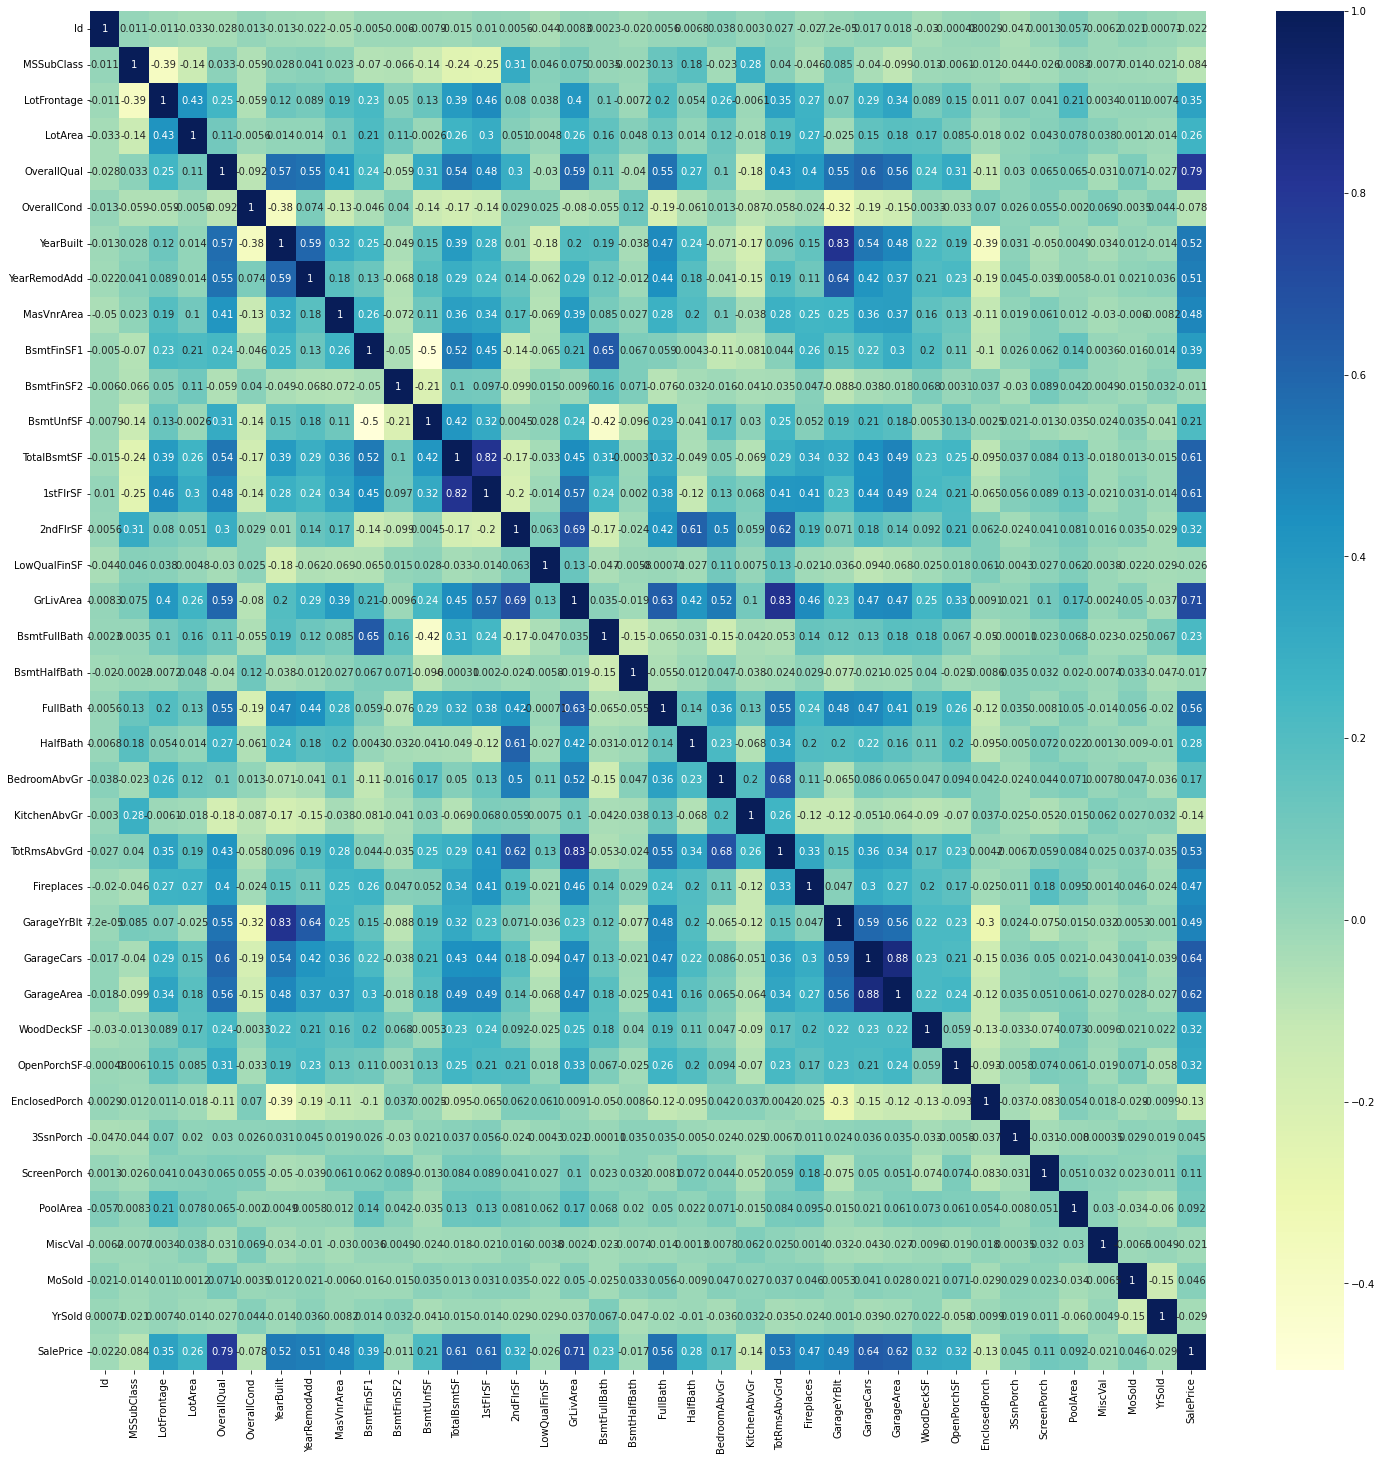

In [11]:
# Checking the correlations of the numerical variables and the target variable by using heatmap

plt.figure(figsize=(25, 25))
sns.heatmap(df_house.corr(), cmap='YlGnBu', annot=True)
plt.show()

**Observation:**
    
According to the heatmap, many columns are highly correlated with each other. 

Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.

We can see the multicollinearity among predictors in our data.

#### Dropping columns that are correlated and not contributing to 'SalePrice'

In [12]:
# Dropping some of the column since it will not be required 
df_house = df_house.drop(['BsmtUnfSF'], axis = 1)
df_house = df_house.drop(['TotRmsAbvGrd'], axis = 1)

df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#  Data Quality Check and Missing Values


In [13]:
df_house.shape

(1460, 79)

In [14]:
# Checking missing values
df_house.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
KitchenQual        0
dtype: int64

In [15]:
df_house.isnull().sum()[df_house.isnull().sum()>0]/len(df_house)*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

**Observation:**

There are lot of missing values in Alley, Poolqc, Fence, Miscfeatures, Fireplacequ, Lotfrontgate these columns.

Lets look at them one by one instead of deleting them.

### Looking into columns one by one with null values

In [16]:
# Checking PoolQC column as it has null values

df_house.PoolQC.value_counts(dropna=False,normalize=True)

NaN    0.995205
Gd     0.002055
Ex     0.001370
Fa     0.001370
Name: PoolQC, dtype: float64

**Observation:**

PoolQC column can be dropped as it has 99 % NULL value, it can be dropped.

It means 99% house doesn't have pool.

In [17]:
df_house.drop('PoolQC', axis='columns',inplace=True)

In [18]:
# Checking Alley column as it has null values

df_house.Alley.value_counts(dropna=False,normalize=True)

NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

**Observation:**

Alley column can be dropped as it has 94% NULL, it can be dropped.

It means 94% houses do not have access to alleys

In [19]:
df_house.drop('Alley', axis='columns',inplace=True)

In [20]:
# Checking Fence column as it has null values

df_house.Fence.value_counts(dropna=False,normalize=True)

NaN      0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

**Obsevation:**

NAN means there is no fence to the house, lets not drop this column.

We can impute nulls with a new cat 'No_Fence'

In [21]:
df_house.Fence.fillna('No_Fence', inplace=True)

In [22]:
df_house.Fence.isnull().sum()

0

In [23]:
# Checking MiscFeature column as it has null values

df_house.MiscFeature.value_counts(dropna=False,normalize=True)

NaN     0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

**Observation:**

Miscellaneous has 96% NaN which means that no such feature exists, but due to highly imbalanced in data we can drop this column.

In [24]:
df_house.drop('MiscFeature', axis='columns',inplace=True)

In [25]:
# Checking FireplaceQu column as it has null values

df_house.FireplaceQu.value_counts(dropna=False,normalize=True)

NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

**Obsevation:**

NAN means there is no fireplace in the house, lets not drop this column.

We can impute nulls with a new cat 'No_Fireplace'

In [26]:
df_house.FireplaceQu.fillna('No_Fireplace',inplace=True)

17.73972602739726

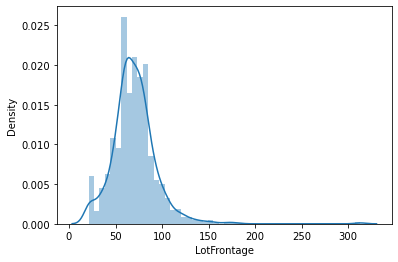

In [27]:
# Checking LotFrontage column as it has null values
sns.distplot(df_house.LotFrontage);
df_house.LotFrontage.isna().sum()/len(df_house)*100

**Observation:**

LotFrontage has many Null values with a numerical value, So we are drpping it.

In [28]:
df_house.drop('LotFrontage',axis='columns',inplace=True)

In [29]:
# Dropping the Id column as it has no use for the prediction
df_house.drop('Id',axis='columns',inplace=True)

In [30]:
# Checking GarageYrBlt column
df_house.GarageYrBlt.value_counts(dropna=False).head(20)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1965.0    21
Name: GarageYrBlt, dtype: int64

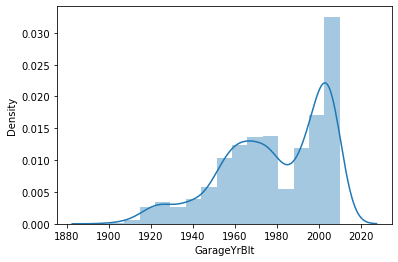

In [31]:
# NaN does not mean anything here, so we can check the disctribution
sns.distplot(df_house.GarageYrBlt);

In [32]:
# Distribution is also not normal so cant impute it by mean 
df_house.GarageYrBlt.fillna('unknown',inplace=True)
df_house[df_house.GarageYrBlt=='unknown']

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,No_Fence,0,6,2008,WD,AdjLand,82000
48,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,No_Fence,0,6,2009,New,Partial,113000
78,90,RL,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No_Fence,0,4,2010,WD,Normal,136500
88,50,C (all),8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,MnPrv,0,10,2009,ConLD,Abnorml,85000
89,20,RL,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No_Fence,0,8,2007,WD,Normal,123600
99,20,RL,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,No_Fence,400,1,2010,WD,Normal,128950
108,50,RM,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,No_Fence,0,8,2007,WD,Normal,115000
125,190,RM,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,Typ,0,No_Fireplace,NaN,unknown,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,No_Fence,0,6,2006,WD,Normal,84500
127,45,RM,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,Typ,1,TA,NaN,unknown,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,No_Fence,0,6,2007,WD,Normal,87000
140,20,RL,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,Typ,1,Po,NaN,unknown,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No_Fence,0,4,2010,ConLI,Normal,115000


**Observation:**
    
All the records where garagebuilt year is absent has garagetype and garagefinish as NaN, So we can say that it has same meaning as NO GARAGE, as NaN in garagequality means No garage.

Dtype of this column is integer, as this is year data, we can use it as catagorical data also by changing the NANs to 'No_Garage'

In [33]:
df_house.GarageYrBlt.replace('unknown','No_Garage',inplace=True)

In [34]:
df_house.GarageYrBlt.value_counts().head()

No_Garage    81
2005.0       65
2006.0       59
2004.0       53
2003.0       50
Name: GarageYrBlt, dtype: int64

**Observation:**
    
All the variables related to garage garagecond,garagtype,garagequal,garagefinish has same number of null values 81 and all of them are for same records as above, so let's impute all of them.

In [35]:
gar_list= ['GarageType','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']

for var in gar_list:
    df_house[var].fillna('No_Garage',inplace=True)

In [36]:
# Checking the missing values again
df_house.isna().sum().sort_values(ascending=False).head(10)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
FireplaceQu      0
Fireplaces       0
dtype: int64

In [37]:
# Checking BsmtFinType2 column
df_house.BsmtFinType2.value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

**Observation:**

Here NaN means there is no basement according to data dict and we have 5 basement related features that have missing values.

In [38]:
df_house.BsmtFinType2.fillna('No_Basement',inplace=True)
df_house[df_house.BsmtFinType2=='No_Basement']

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,Typ,0,No_Fireplace,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,No_Fence,500,10,2006,WD,Normal,90000
39,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,Typ,0,No_Fireplace,No_Garage,No_Garage,No_Garage,0,0,No_Garage,No_Garage,N,0,0,0,0,0,0,No_Fence,0,6,2008,WD,AdjLand,82000
90,20,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,Typ,0,No_Fireplace,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,No_Fence,0,7,2006,WD,Normal,109900
102,90,RL,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,Typ,0,No_Fireplace,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,No_Fence,0,6,2009,WD,Alloca,118964
156,20,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,Typ,0,No_Fireplace,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,No_Fence,0,6,2006,WD,Normal,109500
182,20,RL,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,MnPrv,0,6,2007,WD,Normal,120000
259,20,RM,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,Typ,0,No_Fireplace,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,No_Fence,0,12,2008,WD,Normal,97000
332,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,No_Basement,479,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,No_Fence,0,10,2009,WD,Normal,284000
342,90,RL,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,No_Basement,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,Typ,0,No_Fireplace,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,No_Fence,0,5,2006,WD,Normal,87500
362,85,RL,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,No_Basement,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,No_Fence,0,7,2009,ConLD,Normal,198500


**Observation:**
    
Other variables also have NaN values 37 entries in all basement related columns, So lets impute all of them with 'No_Basement'.

One entry which says it has no basement and still has all the information related to basement features, we will look at that later.

In [39]:
bsmt_list=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1']

for var in bsmt_list:
    df_house[var].fillna('No_Basement',inplace=True)

In [40]:
# Checking ob that one entry only

df_house[(df_house.BsmtFinType2=='No_Basement')&(df_house.BsmtQual=='Gd')]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,No_Basement,479,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,No_Fence,0,10,2009,WD,Normal,284000


Observation: 
    
 It might be data entry mistake, lets check other entries with similar features to decide what to impute.

In [41]:
# Checking BsmtFinType2 column
df_house.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [42]:
# It has 1st basement with GLQ(good living quality) and also expensive,the total area also matches (finished+unfinished basement1&2) 
#we can go with GLQ 
df_house.at[332,'BsmtFinType2'] = 'GLQ'

In [43]:
df_house.iloc[332]['BsmtFinType2']

'GLQ'

In [44]:
df_house.isna().sum().sort_values(ascending=False).head(5)

MasVnrType      8
MasVnrArea      8
Electrical      1
MSSubClass      0
KitchenAbvGr    0
dtype: int64

In [45]:
# Checking MasVnrType column
df_house.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [46]:
df_house.MasVnrType.fillna('unknown', inplace=True)

In [47]:
df_house[df_house.MasVnrType=='unknown']['MasVnrArea']

## Here NAN means zero

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

**Observation:**
    
Let's impute masvnrtype with None and masvnrarea with 0, as it is a continuous numeric column, (if imputed with 'none' it will change the dtype of whole column to object type, which is not good.

In [48]:
df_house.MasVnrArea.fillna(0, inplace=True)

In [49]:
df_house.MasVnrType.replace('unknown','None',inplace=True)

In [50]:
df_house.MasVnrType.value_counts(dropna=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
# Checking Electrical column
df_house.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [52]:
# Imbalance data, impute this with most frequent that is SBrkr
df_house.Electrical.fillna('SBrkr',inplace=True)

In [53]:
df_house.Electrical.value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
# Checking the null count
df_house.isna().sum().sum()

0

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

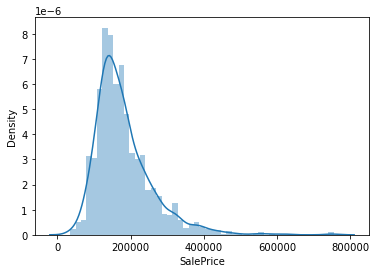

In [55]:
sns.distplot(df_house['SalePrice'])

**Observation:**
    
Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [56]:
## Log transformation
df_house['SalePrice']=np.log1p(df_house['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

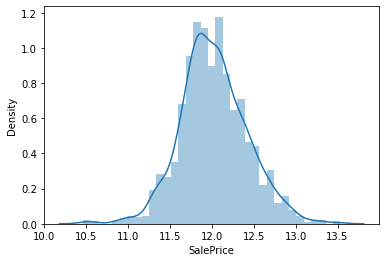

In [57]:
sns.distplot(df_house['SalePrice'])

**Observation:**
    
Our target variable has normal distribution now.

#### Feature Engineering

In [58]:
## Creating new column for the age of the house
df_house['Age'] = df_house['YrSold'] - df_house['YearBuilt']

In [59]:
## Dropping the two columns from which we created new one
df_house.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
df_house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,WD,Normal,12.247699,5
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,WD,Normal,12.109016,31
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,WD,Normal,12.317171,7
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,WD,Abnorml,11.849405,91
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,WD,Normal,12.429220,8


In [60]:
df_house.shape

(1460, 73)

#### Outlier Treatment

In [61]:
num_col = list(df_house.dtypes[df_house.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_house = drop_outliers(df_house)

## We have removed the Outliers 

In [62]:
df_house.shape

(1441, 73)

## Data Preparation

In [63]:
# Converting categorical columns into Dummy variable
df = pd.get_dummies(df_house, drop_first=True)
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrB

In [64]:
df.shape

(1441, 341)

## Modelling

#### Creating test and train data

In [65]:
X = df.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,

In [66]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [67]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [68]:
## Checking dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1008, 340)
(1008,)


In [69]:
## Checking dimensions of test data
print(X_test.shape)
print(y_test.shape)

(433, 340)
(433,)


#### Scaling data

In [70]:
# Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [71]:
# Scalling the data
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [72]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,

##  Model building

In [73]:
# Building a Regression model.
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [74]:
# Selecting RFE for top 50 variables on train data
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [75]:
# Checkind the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 278),
 ('LotArea', False, 209),
 ('OverallQual', False, 96),
 ('OverallCond', False, 166),
 ('YearRemodAdd', False, 214),
 ('MasVnrArea', False, 291),
 ('BsmtFinSF1', False, 217),
 ('BsmtFinSF2', False, 254),
 ('TotalBsmtSF', False, 169),
 ('1stFlrSF', False, 78),
 ('2ndFlrSF', False, 79),
 ('LowQualFinSF', False, 81),
 ('GrLivArea', False, 80),
 ('BsmtFullBath', False, 188),
 ('BsmtHalfBath', False, 290),
 ('FullBath', False, 262),
 ('HalfBath', False, 265),
 ('BedroomAbvGr', False, 248),
 ('KitchenAbvGr', False, 230),
 ('Fireplaces', False, 189),
 ('GarageCars', False, 205),
 ('GarageArea', False, 161),
 ('WoodDeckSF', False, 258),
 ('OpenPorchSF', False, 285),
 ('EnclosedPorch', False, 239),
 ('3SsnPorch', False, 273),
 ('ScreenPorch', False, 224),
 ('PoolArea', False, 77),
 ('MiscVal', False, 276),
 ('MoSold', False, 283),
 ('Age', False, 163),
 ('MSZoning_FV', False, 84),
 ('MSZoning_RH', False, 85),
 ('MSZoning_RL', False, 83),
 ('MSZoning_RM', False, 86),


In [76]:
# Selecting the top 50 features
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'HeatingQC_Po', 'GarageType_No_Garage', 'GarageYrBlt_1908.0',
       'GarageYrBlt_1914.0', 'GarageYrBlt_1916.0', 'GarageYrBlt_1918.0',
       'GarageYrBlt_1923.0', 'GarageYrBlt_1932.0', 'GarageYrBlt_1933.0',
       'GarageYrBlt_1934.0', 'GarageYrBlt_1982.0', 'GarageYrBlt_1990.0',
       'GarageYrBlt_1992.0', 'GarageYrBlt_1993.0', 'GarageYrBlt_1994.0',
       'GarageYrBlt_1995.0', 'GarageYrBlt_1996.0', 'GarageYrBlt_1997.0',
       'GarageYrBlt_1998.0', 'GarageYrBlt_1999.0', 'GarageYrBlt_2000.0',
       'GarageYrBlt_2001.0', 'GarageYrBlt_2002.0', 'GarageYrBlt_2003.0',
       'GarageYrBlt_2004.0', 'GarageYrBlt_2005.0', 'GarageYrBlt_2006.0',
       'GarageYrBlt_2007.0', 'GarageYrBlt_2008.0', 'GarageYrBlt_2009.0',
       'GarageYrBlt_2010.0', 'GarageYrBlt_No_Garage', 'GarageFinish_No_Garage',
       'GarageQual_Fa', 'GarageQual_Gd', 'Ga

In [77]:
# Selecting non-important features
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [78]:
#Checking the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(1008, 50)
(433, 50)
(1008,)
(433,)


In [79]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [80]:
X_train_rfe = pd.DataFrame(X_train[col])

In [81]:
X_train_rfe.head()

,BsmtFinType1_No_Basement,BsmtFinType2_No_Basement,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Po,GarageType_No_Garage,GarageYrBlt_1908.0,GarageYrBlt_1914.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1923.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1982.0,GarageYrBlt_1990.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_No_Garage,GarageFinish_No_Garage,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA
1311,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
937,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
680,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1426,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
895,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [82]:
# Calculating R2 on train_pred
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.953517290228442

In [83]:
# Calculating R2 on test_pred
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-595931381981583.5

**Observation:**

Although the R2 value for train data is 95% but in test data it is negative, so we have to rebuild the model by choosing proper algorithm.

In [84]:
# Selecting RFE for top 50 variables on test data
col_1 = X_test.columns[rfe.support_]
col_1

Index(['BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'HeatingQC_Po', 'GarageType_No_Garage', 'GarageYrBlt_1908.0',
       'GarageYrBlt_1914.0', 'GarageYrBlt_1916.0', 'GarageYrBlt_1918.0',
       'GarageYrBlt_1923.0', 'GarageYrBlt_1932.0', 'GarageYrBlt_1933.0',
       'GarageYrBlt_1934.0', 'GarageYrBlt_1982.0', 'GarageYrBlt_1990.0',
       'GarageYrBlt_1992.0', 'GarageYrBlt_1993.0', 'GarageYrBlt_1994.0',
       'GarageYrBlt_1995.0', 'GarageYrBlt_1996.0', 'GarageYrBlt_1997.0',
       'GarageYrBlt_1998.0', 'GarageYrBlt_1999.0', 'GarageYrBlt_2000.0',
       'GarageYrBlt_2001.0', 'GarageYrBlt_2002.0', 'GarageYrBlt_2003.0',
       'GarageYrBlt_2004.0', 'GarageYrBlt_2005.0', 'GarageYrBlt_2006.0',
       'GarageYrBlt_2007.0', 'GarageYrBlt_2008.0', 'GarageYrBlt_2009.0',
       'GarageYrBlt_2010.0', 'GarageYrBlt_No_Garage', 'GarageFinish_No_Garage',
       'GarageQual_Fa', 'GarageQual_Gd', 'Ga

In [85]:
X_test_rfe = X_test[col_1]

In [86]:
X_test_rfe.head()

,BsmtFinType1_No_Basement,BsmtFinType2_No_Basement,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Po,GarageType_No_Garage,GarageYrBlt_1908.0,GarageYrBlt_1914.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1923.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1982.0,GarageYrBlt_1990.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_No_Garage,GarageFinish_No_Garage,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA
656,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1025,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
479,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
955,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
662,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Lasso and Ridge Regression

#### Ridge Regression

In [87]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.022998,0.006536,0.007212,0.002765,0.0001,{'alpha': 0.0001},-0.121131,-0.096082,-0.110095,-0.088042,-0.092283,-0.100324,-0.098284,-0.106978,-0.099086,-0.099033,-0.101134,0.008983,28,-0.053331,-0.058998,-0.057878,-0.059559,-0.058249,-0.059376,-0.056587,-0.057885,-0.058617,-0.059077,-0.057956,0.001753
1,0.015540,0.002096,0.005063,0.000853,0.001,{'alpha': 0.001},-0.121110,-0.095966,-0.110052,-0.088031,-0.092278,-0.100292,-0.098230,-0.106926,-0.099020,-0.098879,-0.101078,0.008987,27,-0.053336,-0.059003,-0.057880,-0.059563,-0.058254,-0.059376,-0.056590,-0.057888,-0.058621,-0.059082,-0.057959,0.001753
2,0.017144,0.005233,0.006559,0.002365,0.01,{'alpha': 0.01},-0.120842,-0.094939,-0.109678,-0.087925,-0.092231,-0.099979,-0.097719,-0.106404,-0.098473,-0.097553,-0.100574,0.009006,26,-0.053386,-0.059053,-0.057894,-0.059593,-0.058309,-0.059389,-0.056616,-0.057920,-0.058649,-0.059138,-0.057995,0.001750
3,0.018097,0.007141,0.006212,0.002384,0.05,{'alpha': 0.05},-0.119090,-0.091758,-0.108693,-0.087587,-0.092045,-0.098701,-0.096123,-0.104398,-0.097219,-0.094142,-0.098976,0.008904,25,-0.053633,-0.059301,-0.057959,-0.059724,-0.058523,-0.059464,-0.056724,-0.058068,-0.058731,-0.059376,-0.058150,0.001732
4,0.026195,0.007841,0.006923,0.001534,0.1,{'alpha': 0.1},-0.116727,-0.089157,-0.108104,-0.087174,-0.091825,-0.097323,-0.095184,-0.102356,-0.096243,-0.091717,-0.097581,0.008686,23,-0.053963,-0.059604,-0.058056,-0.059917,-0.058747,-0.059598,-0.056897,-0.058264,-0.058879,-0.059582,-0.058351,0.001703


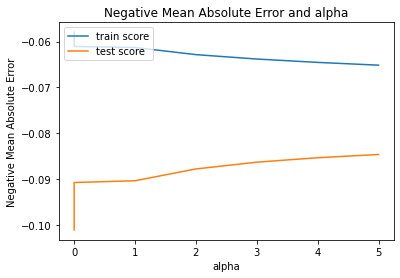

In [89]:
# Plotting the mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Observation:**
    
We will choose this for further analysis because the Negative Mean Absolute Error stabilises at alpha = 2,

In [90]:
model_cv.best_params_

{'alpha': 20}

In [91]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.24104945e-02,  1.68358231e-02,  7.19990035e-02,  4.69790310e-02,
        2.68277954e-02, -6.65583421e-04,  2.20776146e-02,  8.42565746e-03,
        3.80823911e-02,  3.05745656e-02,  4.02562214e-02,  1.20668665e-03,
        5.64146508e-02,  1.76601328e-02, -3.84932875e-04,  1.66672093e-02,
        1.46260737e-02,  1.58252707e-02, -6.24711324e-03,  1.70159628e-02,
        2.27254688e-02,  1.96956611e-02,  1.19318805e-02, -3.66386497e-03,
        9.63953488e-03,  3.63106407e-03,  1.38021955e-02,  0.00000000e+00,
       -2.53514844e-03, -9.13104765e-04, -3.96400911e-02,  4.29097098e-02,
        2.96512255e-02,  3.90225416e-02, -2.19278459e-02,  1.51141607e-02,
        1.20852696e-02,  6.22286039e-03, -2.13248099e-03,  2.36485135e-02,
       -1.82152977e-02,  9.26847469e-03, -5.21877991e-03,  1.50959107e-02,
       -1.37423589e-02, -8.96343096e-03, -1.65576923e-02,  7.04090906e-03,
       -2.62568710e-02, -3.32202617e-03, -9.47051464e-03,  3.80965205e-02,
        5.34588488e-03, -

In [92]:
# Ridge Model Parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.754),
 ('MSSubClass', -0.012),
 ('LotArea', 0.017),
 ('OverallQual', 0.072),
 ('OverallCond', 0.047),
 ('YearRemodAdd', 0.027),
 ('MasVnrArea', -0.001),
 ('BsmtFinSF1', 0.022),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.038),
 ('1stFlrSF', 0.031),
 ('2ndFlrSF', 0.04),
 ('LowQualFinSF', 0.001),
 ('GrLivArea', 0.056),
 ('BsmtFullBath', 0.018),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.017),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', 0.016),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.017),
 ('GarageCars', 0.023),
 ('GarageArea', 0.02),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', -0.004),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.0),
 ('MiscVal', -0.003),
 ('MoSold', -0.001),
 ('Age', -0.04),
 ('MSZoning_FV', 0.043),
 ('MSZoning_RH', 0.03),
 ('MSZoning_RL', 0.039),
 ('MSZoning_RM', -0.022),
 ('Street_Pave', 0.015),
 ('LotShape_IR2', 0.012),
 ('LotShape_IR3', 0.006),
 ('LotShape_Reg', -0.002),
 ('LandContour_HLS', 0.024),
 ('LandCo

In [93]:
# Ridge Regression
lm = Ridge(alpha=20)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9299007595117283
0.9107260379181769


In [94]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1200835212248011


In [95]:
# Creating dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [96]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.754
3,OverallQual,0.072
71,Neighborhood_StoneBr,0.063
339,SaleCondition_Normal,0.059
187,CentralAir_Y,0.056
55,Neighborhood_Crawfor,0.056
13,GrLivArea,0.056
83,Condition2_Norm,0.054
4,OverallCond,0.047
65,Neighborhood_NridgHt,0.047


In [97]:
# Coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.754
3,OverallQual,0.072
71,Neighborhood_StoneBr,0.063
339,SaleCondition_Normal,0.059
187,CentralAir_Y,0.056
55,Neighborhood_Crawfor,0.056
13,GrLivArea,0.056
83,Condition2_Norm,0.054
4,OverallCond,0.047
65,Neighborhood_NridgHt,0.047


In [98]:
## We removed some coeffiencts because some of them are at 0.
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.754
3,OverallQual,0.072
71,Neighborhood_StoneBr,0.063
339,SaleCondition_Normal,0.059
187,CentralAir_Y,0.056
55,Neighborhood_Crawfor,0.056
13,GrLivArea,0.056
83,Condition2_Norm,0.054
4,OverallCond,0.047
65,Neighborhood_NridgHt,0.047


In [99]:
predRFE.shape

(320, 2)

#### Lasso Regression

In [100]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1008, 340)
y_train (1008,)


In [101]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.160410,0.076053,0.006004,0.001882,0.0001,{'alpha': 0.0001},-0.103025,-0.078854,-0.099899,-0.080925,-0.084409,-0.085175,-0.090249,-0.086553,-0.091641,-0.077325,-0.087805,0.008099,2,-0.057674,-0.062880,-0.060677,-0.062634,-0.061736,-0.062580,-0.060360,-0.061722,-0.061638,-0.062638,-0.061454,0.001496
1,0.045984,0.011554,0.005123,0.001513,0.001,{'alpha': 0.001},-0.093497,-0.067844,-0.090977,-0.082874,-0.087857,-0.072474,-0.100736,-0.080095,-0.095219,-0.072676,-0.084425,0.010472,1,-0.072963,-0.075703,-0.073217,-0.075919,-0.075448,-0.075595,-0.072298,-0.075030,-0.072400,-0.075415,-0.074399,0.001409
2,0.016218,0.000935,0.005091,0.000763,0.01,{'alpha': 0.01},-0.099243,-0.072684,-0.090040,-0.089693,-0.100856,-0.078800,-0.116247,-0.088169,-0.107394,-0.090845,-0.093397,0.012283,3,-0.090977,-0.094097,-0.091687,-0.092154,-0.091054,-0.092630,-0.087673,-0.091550,-0.090042,-0.092115,-0.091398,0.001613
3,0.014817,0.001404,0.004712,0.000716,0.05,{'alpha': 0.05},-0.114301,-0.097041,-0.114238,-0.097176,-0.128997,-0.114530,-0.137161,-0.110884,-0.126598,-0.123091,-0.116402,0.012352,4,-0.115318,-0.116412,-0.116069,-0.116933,-0.115140,-0.115929,-0.109161,-0.115623,-0.115292,-0.115303,-0.115118,0.002059
4,0.013663,0.001007,0.004463,0.000190,0.1,{'alpha': 0.1},-0.155337,-0.133819,-0.157630,-0.126605,-0.168347,-0.163197,-0.165642,-0.147409,-0.162788,-0.163326,-0.154410,0.013434,5,-0.153210,-0.154387,-0.154362,-0.154368,-0.152411,-0.151984,-0.147376,-0.153034,-0.154647,-0.153470,-0.152925,0.002039


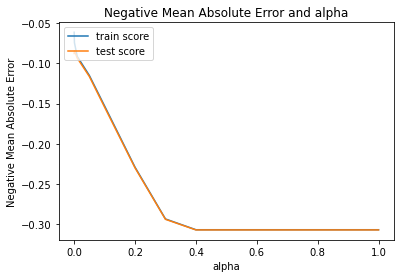

In [103]:
# Plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Observation:**
    
We can see from the above graph  that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises afterthat, but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [104]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [105]:
# The smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated at alpha=0.01
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00965671,  0.01534811,  0.10968893,  0.03542281,  0.03348134,
        0.        ,  0.02381544,  0.        ,  0.04420452,  0.        ,
        0.        , -0.        ,  0.10815388,  0.01145665,  0.        ,
        0.00453135,  0.00714815,  0.        , -0.0025071 ,  0.03183135,
        0.03363102,  0.02315394,  0.00637172, -0.        ,  0.        ,
        0.        ,  0.00422473,  0.        , -0.        , -0.        ,
       -0.0685426 ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.  

**Observation:**
    
We can observe that this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero


In [106]:
# Lasso Model Parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.026),
 ('MSSubClass', -0.01),
 ('LotArea', 0.015),
 ('OverallQual', 0.11),
 ('OverallCond', 0.035),
 ('YearRemodAdd', 0.033),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.108),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.005),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.032),
 ('GarageCars', 0.034),
 ('GarageArea', 0.023),
 ('WoodDeckSF', 0.006),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.004),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('Age', -0.069),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl'

In [107]:
# Lasso Regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9207526969280135
0.9121524935189217


In [108]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11912028637034187


**Observation:**
    
The R2 values for Train and Test matches that indicates an optimum model.

In [109]:
# Creating dataframe for Lasso Coefficients
mod_lasso = list(zip(cols, model_parameters))

In [110]:
para = pd.DataFrame(mod_lasso)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.026
1,MSSubClass,-0.010
2,LotArea,0.015
3,OverallQual,0.110
4,OverallCond,0.035


In [111]:
# Coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.026
3,OverallQual,0.110
13,GrLivArea,0.108
9,TotalBsmtSF,0.044
4,OverallCond,0.035
21,GarageCars,0.034
5,YearRemodAdd,0.033
20,Fireplaces,0.032
7,BsmtFinSF1,0.024
22,GarageArea,0.023


In [112]:
# Chosing variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.026
3,OverallQual,0.110
13,GrLivArea,0.108
9,TotalBsmtSF,0.044
4,OverallCond,0.035
21,GarageCars,0.034
5,YearRemodAdd,0.033
20,Fireplaces,0.032
7,BsmtFinSF1,0.024
22,GarageArea,0.023


In [113]:
# These 19 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(19, 2)

In [114]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'OverallCond', 'GarageCars', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1', 'GarageArea', 'LotArea', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'FullBath', 'ScreenPorch', 'KitchenAbvGr', 'MSSubClass', 'Age']


In [115]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
1311,-0.486037,0.668093,-0.535804,0.527866,0.149792,1.089787,-0.945093,-0.240984,1.141756,1,0.762880,0.828507,-0.263996,1.391708
937,0.870186,0.668093,-0.535804,0.134708,1.012651,-0.240487,0.614078,-0.078014,-0.822220,1,0.016353,0.828507,-0.263996,-0.774437
680,-1.169013,-0.064701,-0.535804,-0.329267,-1.013398,0.219642,0.614078,-0.392787,-0.822220,0,-0.700314,0.828507,-0.263996,-0.118030
1426,1.173731,0.668093,-0.535804,0.403325,0.230834,1.260627,2.173249,0.162182,1.141756,1,1.270519,0.828507,-0.263996,0.628634
895,0.529671,-0.064701,-0.535804,-0.678469,0.030613,-0.106093,0.614078,-0.573738,1.141756,0,0.046214,-1.039804,-0.263996,-0.774437


In [116]:
X_train_lasso.shape

(1008, 14)

In [117]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
656,-0.916059,-0.797495,1.298119,-0.011810,-0.784574,0.818721,-0.945093,-0.015173,1.141756,0,-0.700314,-1.039804,-0.263996,-0.774437
1025,-1.248791,-0.797495,-0.535804,-0.429387,-0.074265,-0.702894,-0.945093,-0.451842,1.141756,0,-0.700314,-1.039804,-0.263996,0.013252
479,-0.764287,-1.530288,1.298119,-0.368338,0.931609,-0.634558,-0.945093,-0.787814,-0.822220,0,0.374686,-1.039804,-0.263996,-0.774437
955,0.844891,-0.064701,0.381158,-0.192516,0.073518,0.085248,-0.945093,-0.558596,-0.822220,0,-0.700314,0.828507,-0.263996,-0.774437
662,-0.256433,-0.064701,-2.369727,0.816018,0.473960,-1.017239,2.173249,0.657338,1.141756,0,-0.700314,-1.039804,-0.263996,-0.774437


**Observation:**

-Although the model performance by Ridge Regression was better in terms of R2 values of Train and Test but
it is better to use Lasso becauce it brings and assigns a zero value to insignificant features and enables us to choosethe predictive variables.

-Equation can be formulated by using the features and coefficients obtained by Lasso.

-We always advised to use simple yet robust model.

In [118]:
# Assigning the Features as x1, x2, x3....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17','x18']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.026
x1,OverallQual,0.110
x2,GrLivArea,0.108
x3,TotalBsmtSF,0.044
x4,OverallCond,0.035
x5,GarageCars,0.034
x6,YearRemodAdd,0.033
x7,Fireplaces,0.032
x8,BsmtFinSF1,0.024
x9,GarageArea,0.023


## Conclusion:

**Suggestions for Surprise Housing:**

- To keep a check on these predictors that affecting the price of the house.

- The higher values of positive coeficients suggest a high sale value and you can look them below:

**Feature Description***

OverallQual-	Rates the overall material and finish of the house

GrLivArea-	Above grade (ground) living area square feet

TotalBsmtSF-	Total square feet of basement area

OverallCond-	Rates the overall condition of the house

GarageCars-	Size of garage in car capacity

- The higher values of negative coeficients suggest a decrease in sale value and you can look them below:

**FeatureDescription**

KitchenAbvGr-	Kitchens above grade

MSSubClass	Identifies the type of dwelling involved in the sale

Age- Age of the house

- We can but the property when the market value of the property is lower than the Predicted Sale Price.

## Subjective Questions 

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Answer:**

The Optimal value of alpha for ridge is 20 and for lasso it is 0.001.


In [119]:
## Building the Ridge Regression model with double value of alpha i.e. 40
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [120]:
# Checking predictions
lm = Ridge(alpha=40)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Checking coeffiecients
# Ridge Model Parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res.head(20)

0.922638556164741
0.9104040901292798
RMSE : 0.12029985435595045


,Variable,Coeff
0,constant,11.754
3,OverallQual,0.072
71,Neighborhood_StoneBr,0.063
339,SaleCondition_Normal,0.059
187,CentralAir_Y,0.056
55,Neighborhood_Crawfor,0.056
13,GrLivArea,0.056
83,Condition2_Norm,0.054
4,OverallCond,0.047
65,Neighborhood_NridgHt,0.047


In [121]:
## Now building the lasso model with double value of alpha i.e. 0.002
alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [122]:
# Checking predictions
lm = Lasso(alpha=0.002)
lm.fit(X_train, y_train)

# prediction 
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Checking coeffiecients
# Lasso Model Parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

mod_lasso = list(zip(cols, model_parameters))
para = pd.DataFrame(mod_lasso)
para.columns = ['Variable', 'Coeff']
para.head(20)

0.903779485555622
0.9061665307821379
RMSE : 0.12311186095571727


,Variable,Coeff
0,constant,11.900
1,MSSubClass,-0.011
2,LotArea,0.014
3,OverallQual,0.095
4,OverallCond,0.048
5,YearRemodAdd,0.025
6,MasVnrArea,0.003
7,BsmtFinSF1,0.024
8,BsmtFinSF2,0.001
9,TotalBsmtSF,0.044


**Looking at the most important predictor variables after the changes are implemented.**

In [123]:
# Below will be the most important predictor variables after the changes are implemented.
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head(10)

,Variable,Coeff
0,constant,11.900
13,GrLivArea,0.104
3,OverallQual,0.095
333,SaleType_New,0.051
4,OverallCond,0.048
9,TotalBsmtSF,0.044
339,SaleCondition_Normal,0.041
75,Condition1_Norm,0.039
187,CentralAir_Y,0.039
55,Neighborhood_Crawfor,0.038


**So the top 5 predictors of Lasso model are :**
 
-GrLivArea

-OverallQual

-SaleType_New

-OverallCond

-TotalBsmtSF

**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


**Answer:**

We will choose Lasso regression as it is giving a feature selection option . It also removed the unwanted features from the model without affecting the model accuracy which makes the model generalized and simple and accurate. 


**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**Answer**

**Dropping the first five important predictors**

In [124]:
# Dropping these top 5 predictors from the train and test data
X_train1 = X_train.drop(['GrLivArea', 'OverallQual', 'SaleType_New', 'OverallCond', 'TotalBsmtSF'], axis=1)
X_test1 = X_test.drop(['GrLivArea', 'OverallQual', 'SaleType_New', 'OverallCond', 'TotalBsmtSF'], axis=1)

In [125]:
# Building the Lasso model for alpha = 0.01
# The smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated at alpha=0.01
lm = Lasso(alpha=0.001)
lm.fit(X_train1, y_train)


y_train_pred1 = lm.predict(X_train1)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred1))
y_test_pred1 = lm.predict(X_test1)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred1))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))


0.9060836929192804
0.8855607665762919
RMSE : 0.1359591621111316


**Observation:**

 R2score of training and testing data has decreased after dropping 5 variables.

In [126]:
# Printing the selected coefficients which have been penalised
mod_lasso1 = pd.DataFrame(index=X_train1.columns)
mod_lasso1.rows = X_train1.columns
mod_lasso1['Coeff'] = lm.coef_
pd.set_option('display.max_rows', None)
mod_lasso1.head(20)

,Coeff
MSSubClass,-0.015078
LotArea,0.013753
YearRemodAdd,0.052616
MasVnrArea,0.006799
BsmtFinSF1,0.031342
BsmtFinSF2,0.009616
1stFlrSF,0.116592
2ndFlrSF,0.106260
LowQualFinSF,0.006312
BsmtFullBath,0.012589


In [128]:
mod_lasso1 = mod_lasso1.sort_values((['Coeff']), axis = 0, ascending = False)
mod_lasso1.head(10)

,Coeff
Neighborhood_StoneBr,0.140218
1stFlrSF,0.116592
2ndFlrSF,0.106260
Neighborhood_NridgHt,0.092733
Neighborhood_Crawfor,0.091900
CentralAir_Y,0.089856
Functional_Typ,0.085479
GarageYrBlt_2009.0,0.068677
SaleCondition_Normal,0.067586
GarageYrBlt_2008.0,0.060974


**Observation:**
    
The five most important predictor variables now are:

-Neighborhood_StoneBr

-1stFlrSF

-2ndFlrSF	

-Neighborhood_NridgHt

-Neighborhood_Crawfor